In [61]:
# import libraries
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error
from numpy import array
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr, kurtosis, skew
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [62]:
# buat fungsi untuk merubah timeseries data menjadi input X dan output y, dengan teknik sliding window
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [63]:
# fungsi tambahan untuk membuat statistical features, semoga meningkatkan akurasi
def stats_features(input_data):
    inp = list()
    for i in range(len(input_data)):
        inp2 = list()
        inp2 = input_data[i]
        min=float(np.min(inp2))
        max=float(np.max(inp2))
        diff=float(max-min)
        std=float(np.std(inp2))
        mean=float(np.mean(inp2))
        median=float(np.median(inp2))
        kurt=float(kurtosis(inp2))
        sk=float(skew(inp2))
        inp2=np.append(inp2,min)
        inp2=np.append(inp2,max)
        inp2=np.append(inp2,diff)
        inp2=np.append(inp2,std)
        inp2=np.append(inp2,mean)
        inp2=np.append(inp2,median)
        inp2=np.append(inp2,kurt)
        inp2=np.append(inp2,sk)
        # print(list(inp2))
        inp=np.append(inp,inp2)
    inp=inp.reshape(len(input_data),-1)
    # print(inp)
    return inp

In [64]:
# model untuk neural network (MLP multi layer perceptron)
def mlp(X_train, X_test, y_train, y_test):
    mlp_model = MLPRegressor(random_state=42)
    mlp_model.fit(X_train, y_train)
    # get the predictions
    y_pred = mlp_model.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse for the model
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)
    # returning the rmse, correlation, and the predictions result
    return rmse, corr, y_pred


In [65]:
# model untuk KNN (K Nearest Neighbors)
def knn(X_train, X_test, y_train, y_test):
    knn_model = KNeighborsRegressor(n_neighbors=3)
    knn_model.fit(X_train, y_train)
    # get the predictions
    y_pred = knn_model.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse for the model
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)
    # returning the rmse, correlation, and the predictions result
    return rmse, corr, y_pred

In [66]:
# model untuk decision tree
def dt(X_train, X_test, y_train, y_test):
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    # get the predictions
    y_pred = dt_model.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse for the model
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)
    # returning the rmse, correlation, and the predictions result
    return rmse, corr, y_pred

In [67]:
# model untuk SVR (Support Vector Regression)
def svr(X_train, X_test, y_train, y_test):
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    # get the predictions
    y_pred = svr_model.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse for the model
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)
    # returning the rmse, correlation, and the predictions result
    return rmse, corr, y_pred

In [68]:
# model untuk random forest
def rf(X_train, X_test, y_train, y_test):
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    # get the predictions
    y_pred = rf_model.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse for the model
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)
    # returning the rmse, correlation, and the predictions result
    return rmse, corr, y_pred

In [69]:
# import dataset
df = pd.read_csv('bikesharing_day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [70]:
df_ori = df
df_ori['date'] = pd.to_datetime(df_ori['dteday'])
df_ori['cnt'].iloc[:10]

0     985
1     801
2    1349
3    1562
4    1600
5    1606
6    1510
7     959
8     822
9    1321
Name: cnt, dtype: int64

In [71]:
df_X = df_ori[['cnt', 'cnt']]
in_seq = df_X.astype('float').values

n_steps_in, n_steps_out = 7, 1
X, y = split_sequences(in_seq, n_steps_in, n_steps_out)

n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = stats_features(X_train)
X_test = stats_features(X_test)

In [72]:
in_seq

array([[ 985.,  985.],
       [ 801.,  801.],
       [1349., 1349.],
       ...,
       [1341., 1341.],
       [1796., 1796.],
       [2729., 2729.]])

In [73]:
X

array([[ 985.,  985.,  801., ..., 1606., 1510., 1510.],
       [ 801.,  801., 1349., ..., 1510.,  959.,  959.],
       [1349., 1349., 1562., ...,  959.,  822.,  822.],
       ...,
       [1749., 1749., 1787., ..., 2114., 3095., 3095.],
       [1787., 1787.,  920., ..., 3095., 1341., 1341.],
       [ 920.,  920., 1013., ..., 1341., 1796., 1796.]])

In [74]:
X.shape

(724, 14)

In [75]:
X[0]

array([ 985.,  985.,  801.,  801., 1349., 1349., 1562., 1562., 1600.,
       1600., 1606., 1606., 1510., 1510.])

In [76]:
y[0]

array([[959., 959.]])

In [77]:
df_new=df_ori[['date','cnt']]
df_new.set_index('date')

,cnt
date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


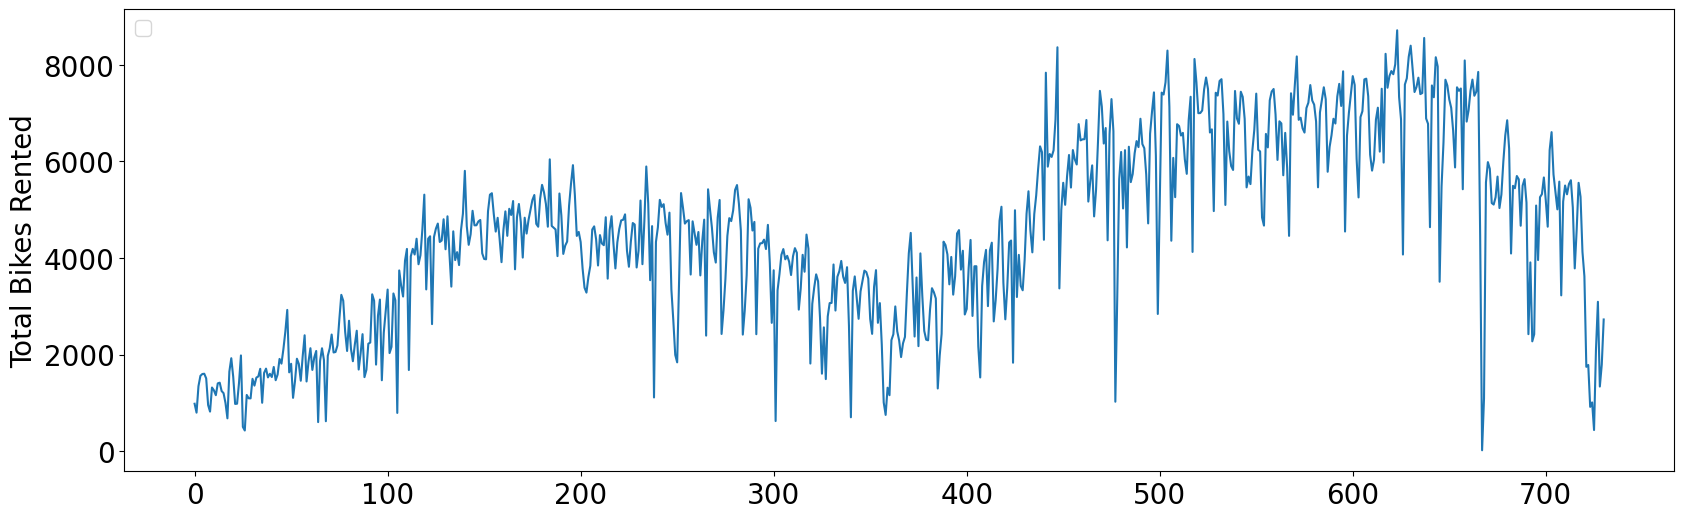

In [78]:
# Exploratory Data Analysis
fig1 = plt.figure(figsize=(20, 6))
plt.plot(df_new['cnt'])

plt.ylabel('Total Bikes Rented', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()